In [3]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (6, 3)
mpl.rcParams['figure.dpi'] = 200

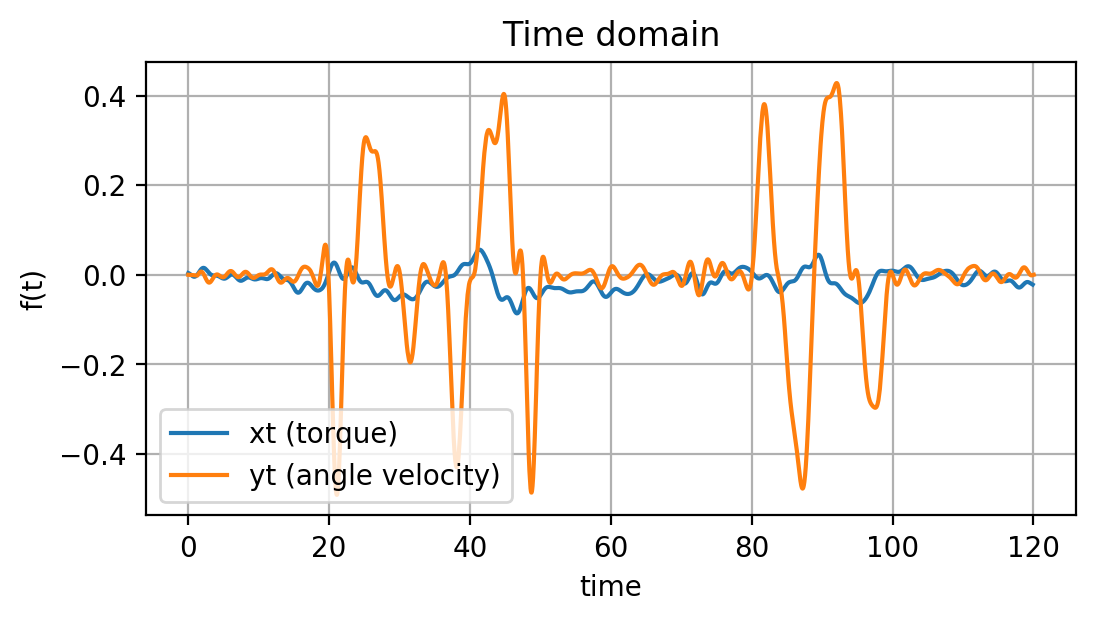

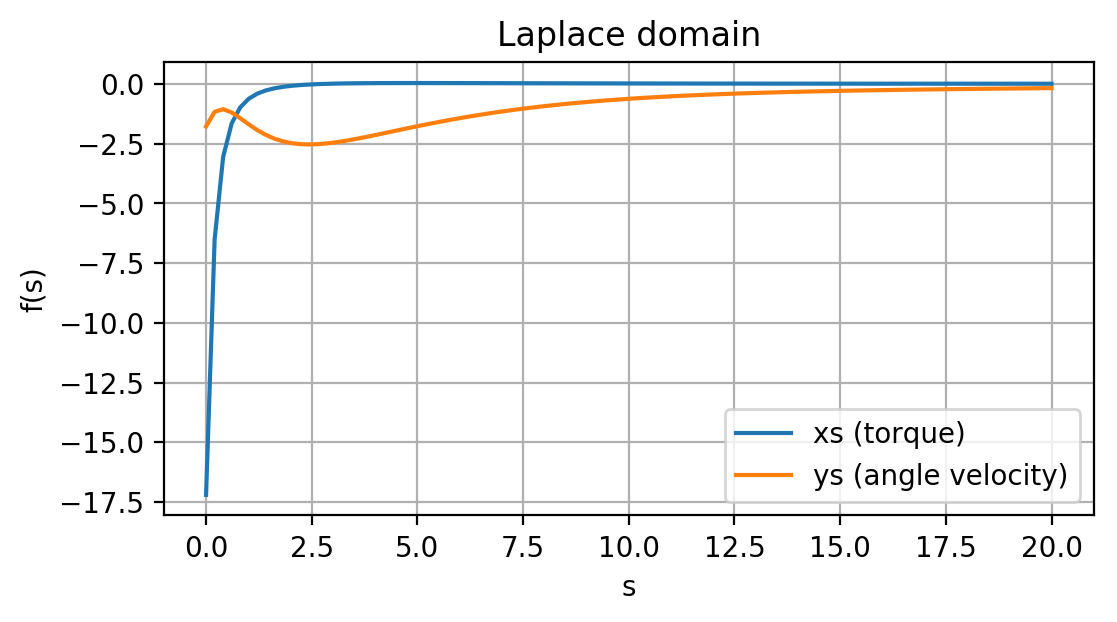

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpmath import mp

tmax=20
s = np.linspace(0, 20, num=100)
t_x = np.array(np.load('torque_times.npy'))
start_time = t_x[0]
t_x = t_x - start_time
t_y = np.array(np.load('ang_vel_times.npy'))
t_y = t_y - start_time

xt = np.array(np.load('torque_fyaw.npy'))
yt = np.array(np.load('ang_vel_fyaw.npy'))

t_y = np.append([0],t_y)
yt = np.append([0],yt)

t_y_1=np.delete(t_y,[len(t_y)-1])
t_y_2=np.delete(t_y,[0])
dty=t_y_2-t_y_1
yt=np.delete(yt,[len(yt)-1])
t_y=np.delete(t_y,[len(t_y)-1])

t_x_1=np.delete(t_x,[len(t_x)-1])
t_x_2=np.delete(t_x,[0])
dtx=t_x_2-t_x_1
xt=np.delete(xt,[len(xt)-1])
t_x=np.delete(t_x,[len(t_x)-1])



xs = np.sum(xt[:, np.newaxis] * np.exp(-s * t_x[:, np.newaxis] * dtx[:, np.newaxis]) , axis = 0)

ys = np.sum(yt[:, np.newaxis] * np.exp(-s* t_y[:, np.newaxis] * dty[:, np.newaxis]), axis = 0)

hs = ys / xs

plt.plot(t_x, xt, label = u'xt (torque)')
plt.plot(t_y, yt, label = u'yt (angle velocity)')

plt.grid(True)
plt.xlabel(u'time')
plt.ylabel(u'f(t)')
plt.title(u'Time domain')
plt.legend()
plt.show()

plt.plot(s, xs, label = u'xs (torque)')
plt.plot(s, ys, label = u'ys (angle velocity)')

plt.grid(True)
plt.xlabel(u's')
plt.ylabel(u'f(s)')
plt.title(u'Laplace domain')
plt.legend()
plt.show()


# def gen_data(s_, k, tet, t2):
#     y = k * np.exp(-tet * s_) / (t2 * s_ + 1)
#     return y

# def fun(x, s_, hs_):
#     return x[0] * np.exp(-x[1] * s_) / (x[2] * s_ + 1) - hs_

# x0 = np.ones(3)

# from scipy.optimize import least_squares

# res_lsq = least_squares(fun, x0, args=(s, hs))

# s_test = s
# hs_lsq = gen_data(s_test, *res_lsq.x)

# plt.plot(s, hs, 'o')
# plt.plot(s_test, hs_lsq, 'k', linewidth=2, label='lsq')

# plt.grid(True)
# plt.show()

# coef = res_lsq.x
# print(coef)